# Clustering Worksheet
This worksheet takes you through the basic steps of working on a sample clustering project. Some parts are already finished and some are left for you to complete. Just a reminder: to execute a block, use `ctrl + enter`. The blocks can contain markdown (text) or code. You can toggle what the block is executed as from the navbar at the top.

Good luck!

### Import the libraries we need
We need some handy code libraries for this task. Below, the library `numpy` is already imported as `np`, which is what we will call it later. Complete the block by importing `seaborn` as `sns`.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Your code goes here!

### Look at the data we have
We have a `.csv` file containing some data about customers of a mall. Below, we load it into a pandas dataframe. Look at what the dataframe contains using the `.head(10)` method. If you get stuck, check out the Pandas.DataFrame documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [4]:
df = pd.read_csv('datasets/customers.csv')
# Your code goes here!

Great, now we know what we're working with! To get a bit more precise information about the dataset, use `.shape` and `.dtypes` to gain further insight in the data. You can also use `.isna().sum()` to calculate how many empty (isNA) values each column contains. This is important because empty values might mess up our results later!

In [6]:
df.shape
# Your code goes here!

(200, 5)

Notice one value that is not meaningful for us? Indeed, customer ID. Let's take that out of our dataframe.

In [ ]:
df=df.drop('CustomerID', axis=1)

Generally, numeric values are easier to work with than strings. Therefore, we want to convert the gender column to numeric. Let's say "Male" becomes 1 and "Female" 0. (The following code is complete, but you need to execute it!)

In [10]:
# If Gender equals Male, 1, otherwise, yield 0.
df['Gender']=np.where(df['Gender']=='Male', 1, 0)
df.head()

/Users/magdapoppins/anaconda3/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

Good! Let's take one last peek at our dataset before we get to work. Use `.describe()` to see the basic statistical values of the dataframe.

In [11]:
# Your code goes here!

### Getting on with the clusters
As you might recall, K-Means is a clustering technique that requires that we know what amount of clusters we are looking for. How can we choose the correct amount? Shouldn't more clusters always lead to a smaller variance within the cluster (a higher level of similarity)?

Check out the K-Means documentation to find out what (kmeans.inertia_) is: https://scikit-learn.org/stable/modules/clustering.html#k-means

Execute the code below. How can we interpret the result? What could be a reasonable number of clusters? You can read more about the "elbow criterion" here: https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion

If you want to know more about the plot, check out the documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

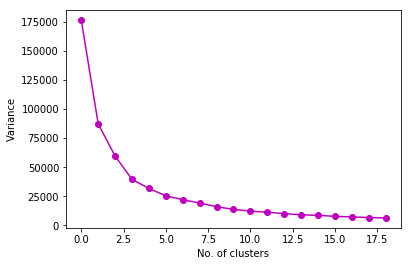

In [16]:
variances = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, max_iter=200) 
    kmeans.fit_predict(df[['Gender', 'Age', 'Annual Income (k$)']])
    variances.append(kmeans.inertia_)
    
plt.plot(variances, '-mo')
plt.xlabel("No. of clusters")
plt.ylabel("Variance")
plt.show()

In [ ]:
# Add your selected number of clusters
cluster_no = 

### Working with our model
We now have selected a good number of clusters and want to actually see what we get out of it.

In [17]:
kmeans = KMeans(n_clusters=5, max_iter=200) 
clusters=kmeans.fit_predict(df)

In [18]:
df['cluster']=clusters

Here we use seaborns `pairplot` to plot the distributions of our data. The clusters are defining the hue of the points. What can we understand from the results? How can you describe the segments we found?

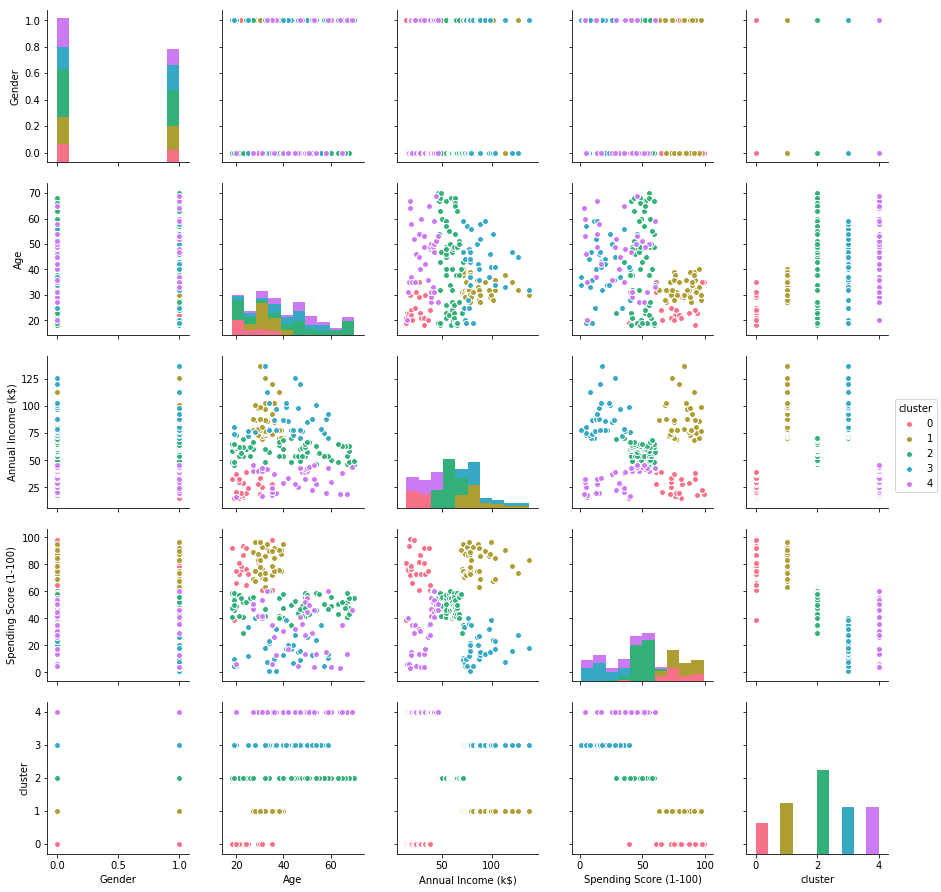

In [22]:
sns.pairplot(df, hue="cluster", palette="husl")